In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pickle

# Load the dataset
df = pd.read_csv('D:/Infosys Springboard/Internship 5.0 Python Tech Stack/Cyber Bullying Detection Project/labelled_comments_17621.csv')

# Preprocess the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the dataset
X = df['preprocessed_comments'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 500  # Adjust as per your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the RNN model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=128))

# Simple RNN layer
model.add(SimpleRNN(128, return_sequences=False))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'RNN Model Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('cyberbullying_rnn_model.h5')

# Save the tokenizer object to a .pkl file
with open('tokenizer_rnn.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
print("Tokenizer saved as 'tokenizer_rnn.pkl'")

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 62s 319ms/step - accuracy: 0.6915 - loss: 0.5384 - val_accuracy: 0.8066 - val_loss: 0.4084
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 311ms/step - accuracy: 0.7771 - loss: 0.4168 - val_accuracy: 0.8217 - val_loss: 0.3537
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 311ms/step - accuracy: 0.8928 - loss: 0.2449 - val_accuracy: 0.8226 - val_loss: 0.3660
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 301ms/step - accuracy: 0.9392 - loss: 0.1589 - val_accuracy: 0.7617 - val_loss: 0.5270
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9059 - loss: 0.2215 - val_accuracy: 0.8183 - val_loss: 0.4165
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.8124 - loss: 0.4404


RNN Model Accuracy: 81.83%
Tokenizer saved as 'tokenizer_rnn.pkl'


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step
Confusion Matrix:
[[2082  576]
 [ 545 2965]]
Accuracy: 0.82


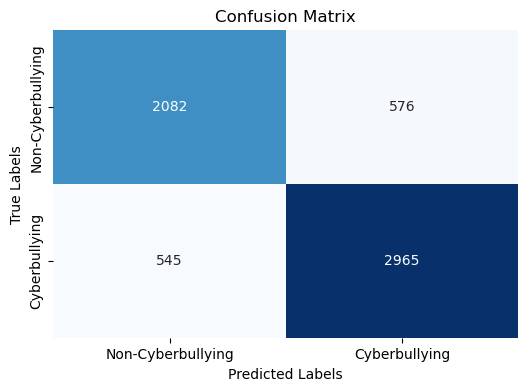

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Cyberbullying', 'Cyberbullying'],
            yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()